In [1]:
data<-NULL
y_sumsq<-0
M<- Y_bar <- NULL
for (i in 1:8) {
    fn <- paste("school", i, ".dat", sep = "")
    datai <- read.table(fn)
    data <- c(data, datai)
    y<-datai$V1
    M<-c(M,length(y))
    Y_bar <- c(Y_bar,mean(y))
    theta <- Y_bar
    y_sumsq <- sum((y-theta[i])^2)+y_sumsq
}
y_sumsq
M


[1] 2465.04

[1] 25 23 20 24 24 22 22 20

# Promblem 8.3
(a)It seems that 5000 sample size is enough because the plots show no evidence of chain not achieving stationary.

In [2]:
# hierarchical
mu <- mu0 <- 7
lambda0_sq <- 5
tao_sq <- tao0_sq <- 10
eta0 <- 2
sigma_sq <- sigma0_sq <- 15
nu0 <- 2
THETA <- MST<-SIGMA_sq <- NULL
n<-sum(M)
theta_sumsq<-sum((theta-mu)^2)



In [3]:
post_norm_arg <- function(n,y_bar,mu0,sigma_sq,tao_sq){
    return(c(((n*y_bar/sigma_sq)+(mu0/tao_sq))/(n/sigma_sq+1/tao_sq),1/(n/sigma_sq+1/tao_sq)))
}
post_gamma_arg <- function(m,sum_sq,nu_0,tao0_sq){
    return(c((nu_0+m)/2,(nu_0*tao0_sq+sum_sq)/2))
}

for(i in 1:5000){
    arg <- post_norm_arg(8,mean(theta),mu0,tao_sq,lambda0_sq)
    mu <- rnorm(1,arg[1],sqrt(arg[2]))
    arg <- post_gamma_arg(8,theta_sumsq,eta0,tao0_sq)
    tao_sq <- 1/rgamma(1,arg[1],arg[2])
    arg <- post_gamma_arg(n,y_sumsq,nu0,sigma0_sq)
    sigma_sq <- 1/rgamma(1,arg[1],arg[2])
    y_sumsq<-0
    for (j in 1:8){
        m<- M[j]
        y_bar<- Y_bar[j]
        y<- data[j]$V1
        arg<-post_norm_arg(m,y_bar,mu,sigma_sq,tao_sq)
        theta[j] <- rnorm(1,arg[1],sqrt(arg[2]))
        y_sumsq <- sum((y-theta[j])^2)+y_sumsq
    }
    theta_sumsq<-sum((theta-mu)^2)
    THETA<-rbind(THETA,c(theta))
    MST<-rbind(MST,c(mu,sigma_sq,tao_sq))
}

In [4]:
stationarity.plot<-function(x,...){
  
  S<-length(x)
  scan<-1:S
  ng<-min( round(S/100),10)
  group<-S*ceiling( ng*scan/S) /ng
  
  boxplot(x~group,...)               }

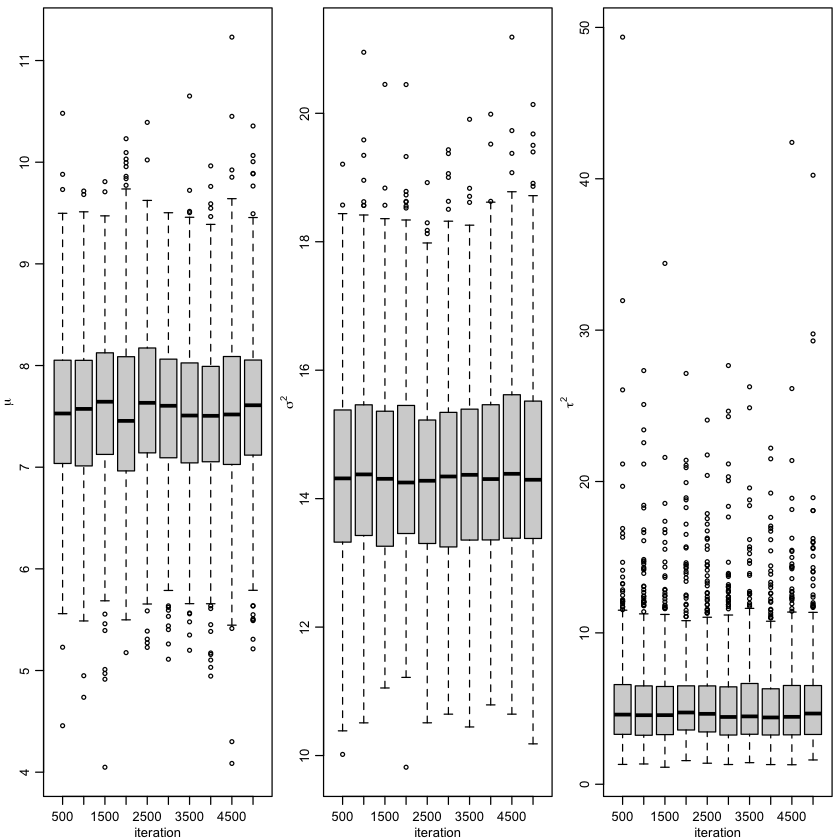

In [5]:
par(bg='white')
par(mfrow=c(1,3),mar=c(2.75,2.75,.5,.5),mgp=c(1.7,.7,0))
stationarity.plot(MST[,1],xlab="iteration",ylab=expression(mu))
stationarity.plot(MST[,2],xlab="iteration",ylab=expression(sigma^2))
stationarity.plot(MST[,3],xlab="iteration",ylab=expression(tau^2))

In [6]:
colMeans(MST)

[1]  7.560347 14.437502  5.438495

(b) 
\
The means and $95%$ confidence regions are  below


In [7]:
quantile(MST[,1],c(.025,.5,.975))
quantile(MST[,2],c(.025,.5,.975))
quantile(MST[,3],c(.025,.5,.975))

2.5%      50%    97.5% 
5.931019 7.557668 9.129593

2.5%      50%    97.5% 
11.71375 14.32871 17.81519

2.5%       50%     97.5% 
 1.928253  4.554294 14.136923

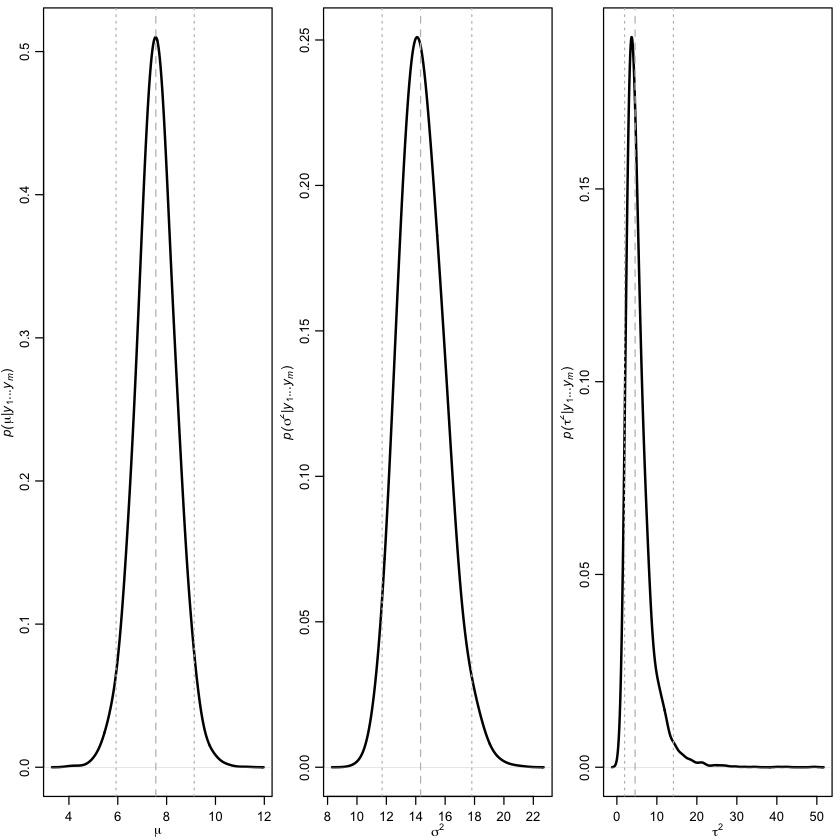

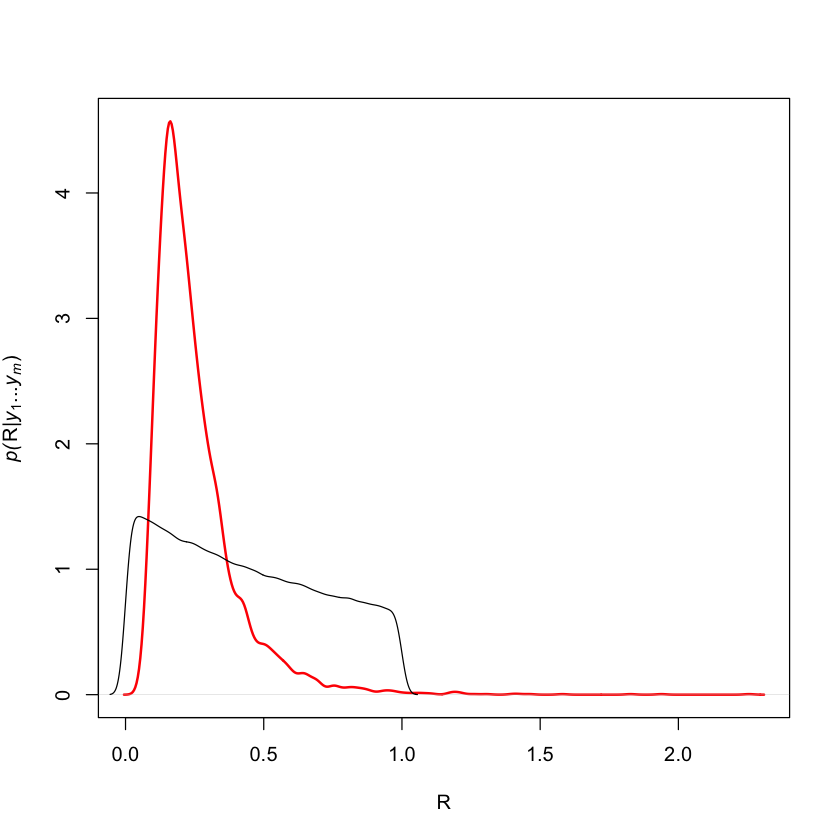

In [17]:
R<-MST[,3]/(MST[,2]+MST[3])
par(bg='white')
plot(density(R),col='red',xlab=expression(R),main="",lwd=2,ylab=expression(paste(italic("p("),R,"|",italic(y[1]),"...",italic(y[m]),")")))
l<-length(MST[,3])*100
S0<-1/rgamma(l,nu0/2,nu0*sigma0_sq/2)
T0<-1/rgamma(l,eta0/2,eta0*tao0_sq/2)
R0<-T0/(S0+T0)
lines(density(R0))

(d)

The probability is given below

In [10]:
mean(THETA[,7]<THETA[,6])
mmin<- rep(1,length(THETA[,7]))
mmin2<-2*mmin
for(i in 1:8){
    mmin<-(mmin+(THETA[,7]<=THETA[,i]))==mmin2
}
mean(mmin)

[1] 0.5216

[1] 0.3174

(e)

shrinkage seems show no obvious differences in groups and sample sizes because too little groups and samples here.

[1] 7.560347

[1] 7.691278

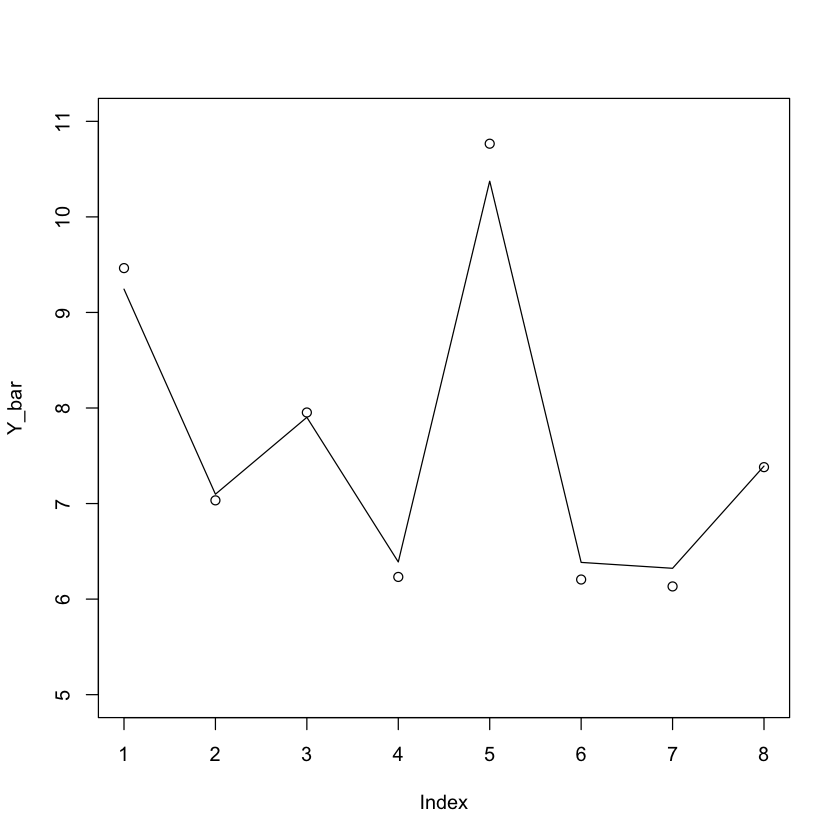

In [11]:
par(bg='white')
plot(Y_bar,ylim=c(5,11))
lines(colMeans(THETA))
mean(MST[,1])
sum(Y_bar*M/n)


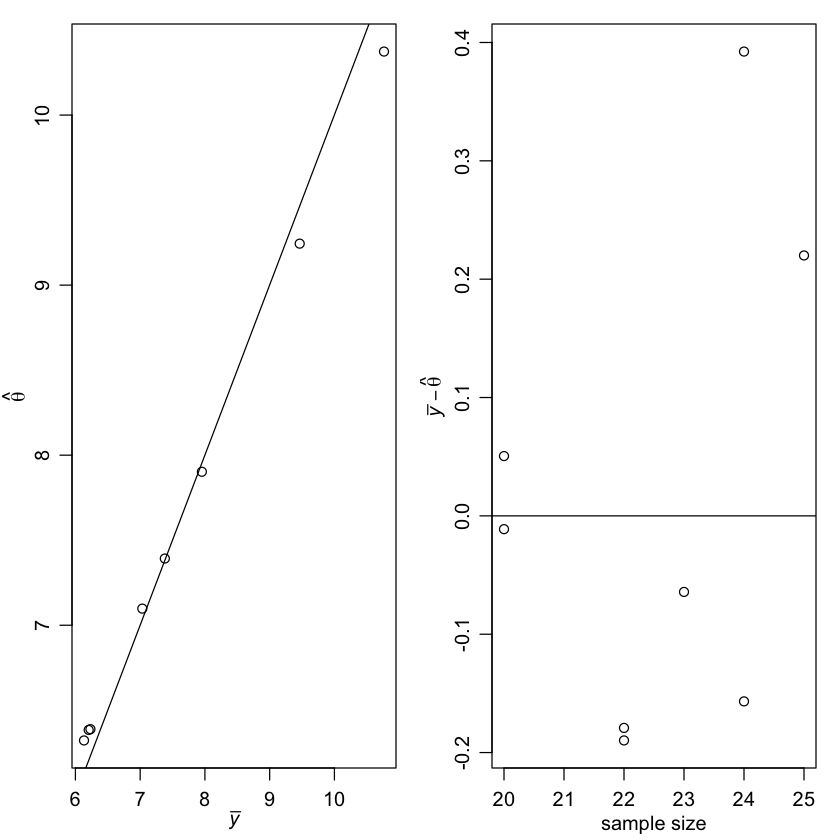

In [12]:

par(bg='white',mfrow=c(1,2),mar=c(3,3,1,1),mgp=c(1.75,.75,0))
theta.hat<-apply(THETA,2,mean)
plot(Y_bar,theta.hat,xlab=expression(bar(italic(y))),ylab=expression(hat(theta)))
abline(0,1)
plot(M,Y_bar-theta.hat,ylab=expression( bar(italic(y))-hat(theta) ),xlab="sample size")
abline(h=0)

In [13]:
# data<-y_sumsq<-NULL
# M<- Y_bar <- NULL
# sv<-NULL
# for (i in 1:8) {
#     fn <- paste("school", i, ".dat", sep = "")
#     datai <- read.table(fn)
#     data <- c(data, datai)
#     M<-c(M,length(datai$V1))
#     Y_bar <- c(Y_bar,mean(datai$V1))
#     sv <- c(sv,var(datai$V1))
# }
# mu <- mu0 <- 7
# lambda0_sq <- 5
# tao_sq <- tao0_sq <- 10
# eta0 <- 2
# sigma_sq <- sigma0_sq <- 15
# nu0 <- 2
# THETA <- MST<-SIGMA_sq <- NULL
# n<-sum(M)
# theta <- Y_bar
# theta_sumsq<-sum((theta-mu)^2)
# sigma_sq<- rep(sigma0_sq,8)
# for(i in 1:5000){
#     y_sumsq<-0
#     arg <- post_norm_arg(8,mean(theta),tao_sq,lambda0_sq)
#     mu <- rnorm(1,arg[1],sqrt(arg[2]))
#     arg <- post_gamma_arg(8,theta_sumsq,eta0,tao0_sq)
#     tao_sq <- 1/rgamma(1,arg[1],arg[2])
#     for (j in 1:8){
#         m<- M[j]
#         y_bar<- Y_bar[j]
#         y<- data[j]$V1
#         y_sumsq <- sum((y-theta[j])^2)
#         arg <- post_gamma_arg(m,y_sumsq,nu0,sigma0_sq)
#         sigma_sq[j]<- 1/rgamma(1,arg[1],arg[2])
#         arg<-post_norm_arg(m,y_bar,sigma_sq[j],tao_sq)
#         theta[j] <- rnorm(1,arg[1],sqrt(arg[2]))
#     }
#     theta_sumsq<-sum((theta-mu)^2)
#     THETA<-rbind(THETA,c(theta))
#     SIGMA_sq<-rbind(SIGMA_sq,c(sigma_sq))
# }

In [14]:

# apply(SIGMA_sq,2,mean) -> sigma2.hat

# par(bg='white',mfrow=c(1,2),mar=c(3,3,1,1),mgp=c(1.75,.75,0))
# plot(sv,sigma2.hat,xlab=expression(s^2),ylab=expression(hat( sigma^2)) )
# abline(0,1)
# plot(M, sv-sigma2.hat,xlab="sample size",ylab=expression(s^2-hat(sigma^2)))  
# abline(h=0)

In [33]:
data<- read.csv('literacy.csv')
sch<-NULL
for(i in 1:7){
    schi<-data.frame(data[1][data['schoolID']==i])
    sch<- c(sch,schi)
}



[1] 63 27 20 16  2 71 63  3